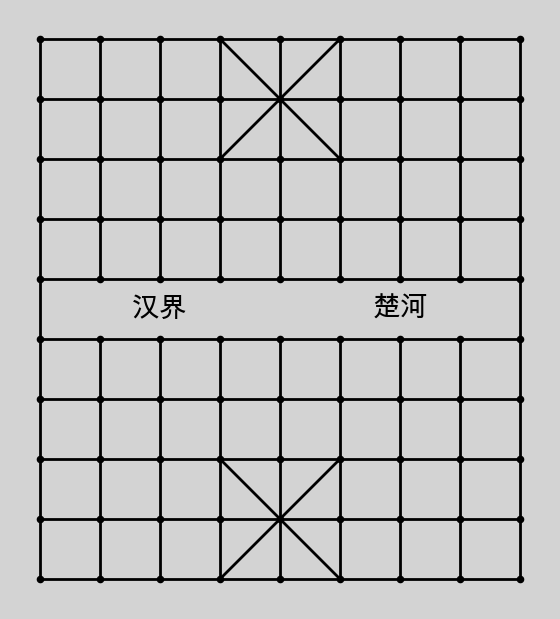

In [136]:
import matplotlib.pyplot as plt
from PIL import Image

# Board dimensions
cols, rows = 9, 10
board_width = 540   # Fixed width
board_height = 600  # Fixed height
cell_size = 60  # Ensuring 1 interval = 1 pixel
margin = cell_size / 2  # Half of the cell size
# margin = 0

# Create figure and axis
fig = plt.figure(figsize=(board_width / 100, board_height / 100), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])  # Ensures the board fits exactly without extra padding

# Set background color
fig.patch.set_facecolor('lightgray')  # Image background
ax.set_facecolor('white')  # Board background

# Set axis limits to ensure 1 interval = 1 pixel
ax.set_xlim(0, board_width)
ax.set_ylim(0, board_height)
ax.set_aspect('equal')  # Ensures 1:1 scaling between x and y

# Draw vertical lines
for i in range(cols):
    x = margin + i * cell_size
    if i == 0 or i == cols - 1:
        ax.plot([x, x], [margin, margin + cell_size * 9], color='black', linewidth=2)
    else:
        ax.plot([x, x], [margin, margin + cell_size * 4], color='black', linewidth=2)
        ax.plot([x, x], [margin + cell_size * 5, margin + cell_size * 9], color='black', linewidth=2)
        
# Draw horizontal lines
for i in range(rows):
    y = margin + i * cell_size
    ax.plot([margin, margin + cell_size * (cols - 1)], [y, y], color='black', linewidth=2)

# Draw palace areas (九宫) with diagonal lines
palace_x_start = margin + 3 * cell_size
palace_x_end = margin + 5 * cell_size
palace_y_top = [margin, margin + 2 * cell_size]
palace_y_bottom = [margin + 7 * cell_size, margin + 9 * cell_size]

ax.plot([palace_x_start, palace_x_end], [palace_y_top[0], palace_y_top[1]], color='black', linewidth=2)
ax.plot([palace_x_end, palace_x_start], [palace_y_top[0], palace_y_top[1]], color='black', linewidth=2)
ax.plot([palace_x_start, palace_x_end], [palace_y_bottom[1], palace_y_bottom[0]], color='black', linewidth=2)
ax.plot([palace_x_end, palace_x_start], [palace_y_bottom[1], palace_y_bottom[0]], color='black', linewidth=2)

# Add "楚河汉界" (Chu River, Han Border) text
ax.text(margin + cell_size * 8 * 1 / 4, margin + cell_size * 4.5, "汉界", fontsize=20, fontweight='bold', ha='center', va='center', fontname="Arial Unicode MS", color='black')
ax.text(margin + cell_size * 8 * 3 / 4, margin + cell_size * 4.5, "楚河", fontsize=20, fontweight='bold', ha='center', va='center', fontname="Arial Unicode MS", color='black')

# Draw intersections for piece placements
for row in range(rows):
    for col in range(cols):
        ax.scatter(margin + col * cell_size, margin + row * cell_size, color='black', s=20)

# Remove axis ticks and labels
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_frame_on(False)
ax.axis("off")

# Save the generated board image
board_image_path = "./img/chessboard.png"
plt.savefig(board_image_path, dpi=100, bbox_inches='tight', pad_inches=0)

# Show the corrected board
plt.show()

# Resize to exactly 540x600 to match your CSS
image = Image.open(board_image_path)
resized_image = image.resize((540, 600))
resized_image.save(board_image_path)
